In [1]:
import random
import os
import h5py
import numpy as np
from work.dataset.activitynet import ActivityNetDataset

dataset = ActivityNetDataset(
    videos_path='../../../../../dataset/videos.json',
    labels_path='../../../../../dataset/labels.txt'
)
videos = dataset.get_subset_videos('validation')
videos = random.sample(videos, 8)

In [2]:
experiment = 2
nb_epoch = 100

predictions_file = '../predictions/predictions_{experiment:02d}_e{nb_epoch:03d}.hdf5'.format(
    experiment=experiment, nb_epoch=nb_epoch)
weights_path = '../model_snapshot/lstm_activity_classification_{experiment:02d}_e{nb_epoch:03d}.hdf5'
predictions_dataset = h5py.File(predictions_file, 'r')['validation']

predictions = []
for v in videos:
    prediction = predictions_dataset[v.video_id][...]
    class_prediction = np.argmax(prediction, axis=1)
    predictions.append((v, prediction, class_prediction))

Video ID: NjzUWVoc8rw		Ground truth: Tennis serve with ball bouncing
0.3052	Disc dog
0.2274	Tennis serve with ball bouncing
0.0541	Playing field hockey


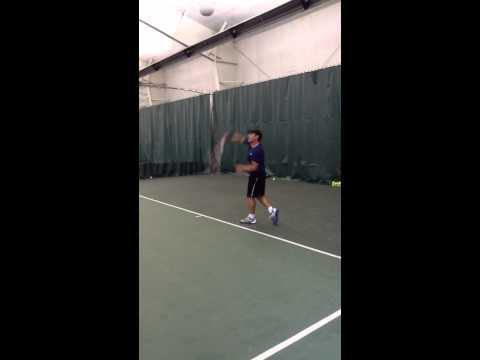

[{u'segment': [1.1048315132605304, 7.095979719188767], u'label': u'Tennis serve with ball bouncing'}]


Video ID: -M-Dr6HqDhU		Ground truth: Painting furniture
0.0231	Hanging wallpaper
0.0192	Blow-drying hair
0.0175	Bungee jumping


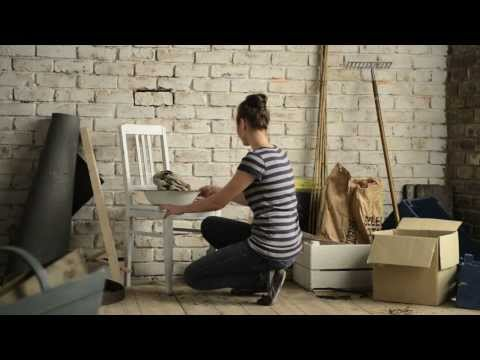

[{u'segment': [30.22895709828393, 38.591047581903275], u'label': u'Painting furniture'}]


Video ID: UGjF8G0HLZA		Ground truth: Paintball
0.4003	Paintball
0.1363	Archery
0.0262	Doing motocross


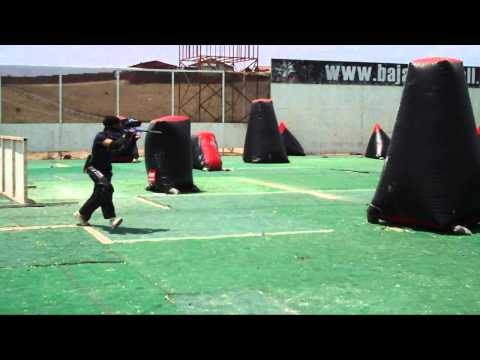

[{u'segment': [23.598725990639625, 72.72492], u'label': u'Paintball'}]


Video ID: HzSCfBOefA4		Ground truth: Washing dishes
0.1881	Plastering
0.1309	Smoking hookah
0.0592	Drinking beer


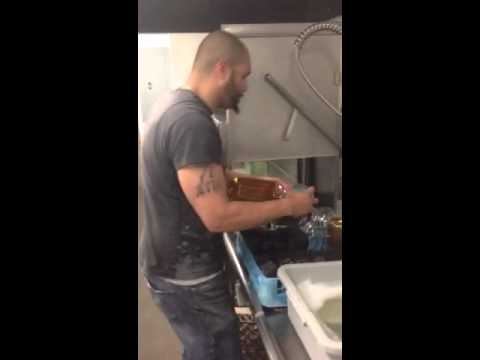

[{u'segment': [4.7306763454211636, 10.023413246733952], u'label': u'Washing dishes'}, {u'segment': [15.784533229329172, 27.587804368174726], u'label': u'Washing dishes'}]


Video ID: MTJ1EtiizVQ		Ground truth: Tango
0.9710	Tango
0.0018	Breakdancing
0.0011	Belly dance


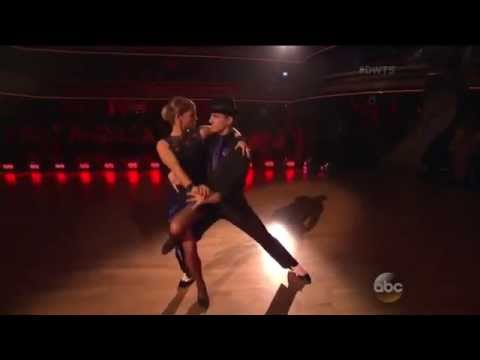

[{u'segment': [7.739293329173168, 96.90240189235571], u'label': u'Tango'}]


Video ID: 6j-H-tIjJvA		Ground truth: Beach soccer
0.8989	Beach soccer
0.0287	Playing blackjack
0.0124	Playing beach volleyball


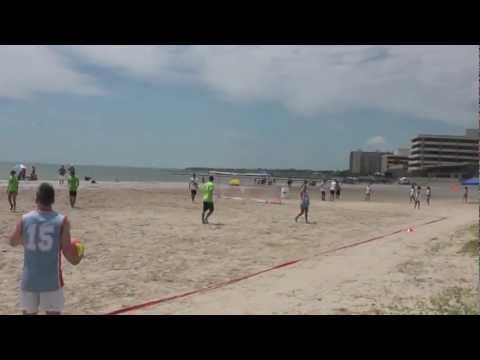

[{u'segment': [25.194918653889015, 40.671797255563696], u'label': u'Beach soccer'}, {u'segment': [43.91114393963514, 115.17677098920693], u'label': u'Beach soccer'}, {u'segment': [119.85582731064345, 160.52762456620715], u'label': u'Beach soccer'}, {u'segment': [165.92653570632623, 193.64094622560413], u'label': u'Beach soccer'}]


Video ID: UWTpfygMUQw		Ground truth: Fixing the roof
0.6308	Roof shingle removal
0.0372	Fixing the roof
0.0200	Pole vault


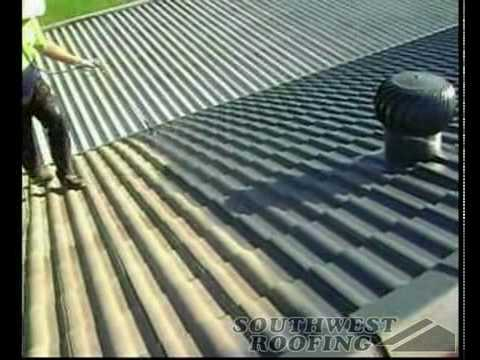

[{u'segment': [33.31364953271028, 145.45924766355142], u'label': u'Fixing the roof'}]


Video ID: hiVs1hNyPpw		Ground truth: Brushing hair
0.7894	Braiding hair
0.0907	Blow-drying hair
0.0197	Brushing hair


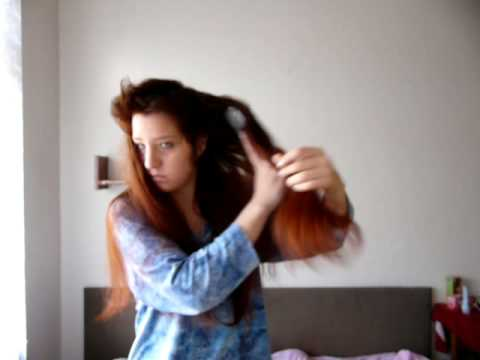

[{u'segment': [0.01, 64.551473], u'label': u'Brushing hair'}]




In [3]:
from IPython.display import YouTubeVideo, display

for v, prediction, class_prediction in predictions:
    print('Video ID: {}\t\tGround truth: {}'.format(v.video_id, v.get_activity()))
    class_means = np.mean(prediction, axis=0)
    top_3 = np.argsort(class_means[1:])[::-1][:3] + 1
    scores = class_means[top_3]/np.sum(class_means[1:])
    for index, score in zip(top_3, scores):
        if score == 0.:
            continue
        label = dataset.labels[index][1]
        print('{:.4f}\t{}'.format(score, label))
    vid = YouTubeVideo(v.video_id)
    display(vid)
    print v.annotations
    print('\n')

Video ID: NjzUWVoc8rw
Main Activity: Tennis serve with ball bouncing


/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


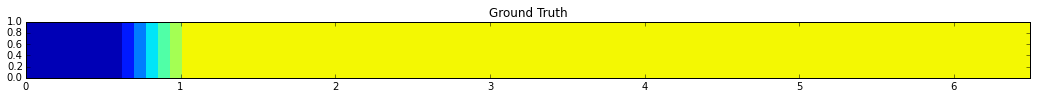

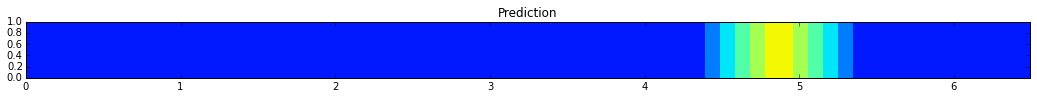

[{'score': 0.92307692307692313, 'segment': [1.6235944700460829, 7.0355760368663596], 'label': 27}]


Video ID: -M-Dr6HqDhU
Main Activity: Painting furniture


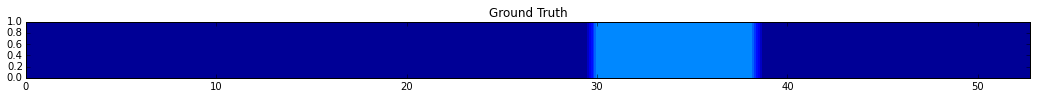

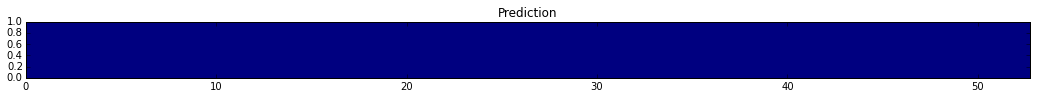

[]


Video ID: UGjF8G0HLZA
Main Activity: Paintball


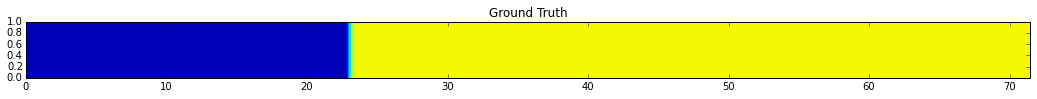

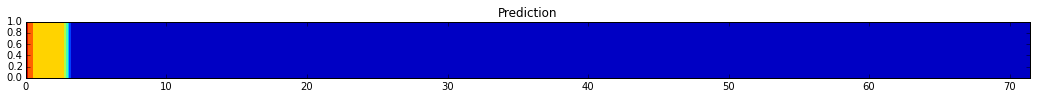

[{'score': 0.80000000000000004, 'segment': [1.3360275545350173, 4.0080826636050517], 'label': 134}]


Video ID: HzSCfBOefA4
Main Activity: Washing dishes


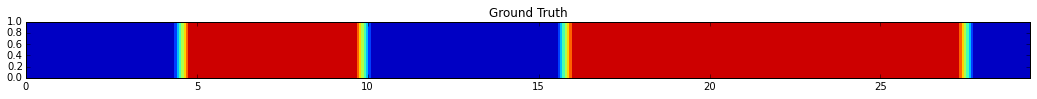

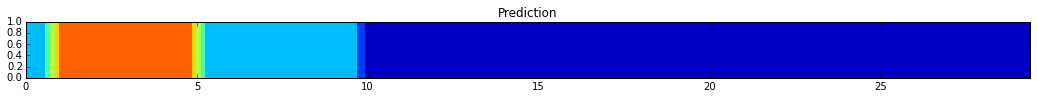

[{'score': 0.47368421052631576, 'segment': [5.8771078976640707, 10.685650723025583], 'label': 58}]


Video ID: MTJ1EtiizVQ
Main Activity: Tango


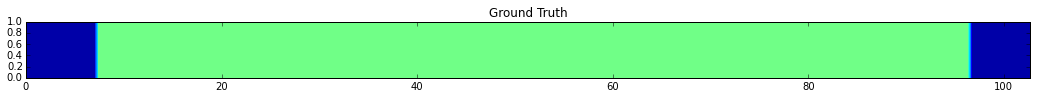

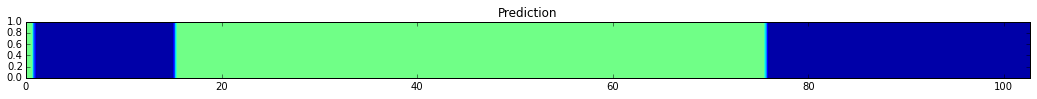

[{'score': 1.0, 'segment': [1.6049175024263993, 2.6748625040439986], 'label': 105}, {'score': 1.0, 'segment': [14.444257521837592, 76.501067615658357], 'label': 105}]


Video ID: 6j-H-tIjJvA
Main Activity: Beach soccer


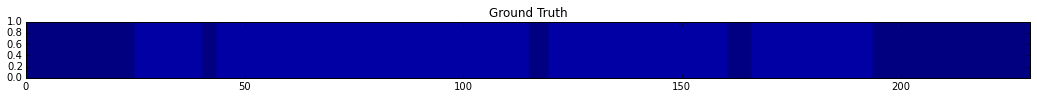

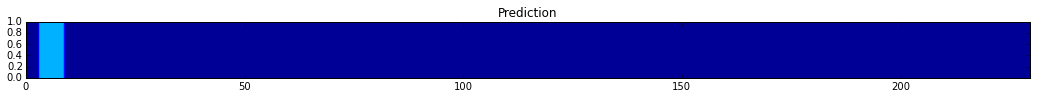

[{'score': 0.93854748603351956, 'segment': [11.751024164375634, 24.570323252785414], 'label': 7}, {'score': 0.93854748603351956, 'segment': [49.674783967587906, 87.064406308783106], 'label': 7}, {'score': 0.93854748603351956, 'segment': [93.474055852987988, 95.076468239039215], 'label': 7}, {'score': 0.93854748603351956, 'segment': [112.70300448560266, 113.77127940963682], 'label': 7}, {'score': 0.93854748603351956, 'segment': [138.87574012443929, 141.54642743452467], 'label': 7}, {'score': 0.93854748603351956, 'segment': [142.08056489654174, 142.61470235855882], 'label': 7}, {'score': 0.93854748603351956, 'segment': [143.68297728259296, 161.84365099117349], 'label': 7}, {'score': 0.93854748603351956, 'segment': [165.04847576327595, 198.16499840833455], 'label': 7}]


Video ID: UWTpfygMUQw
Main Activity: Fixing the roof


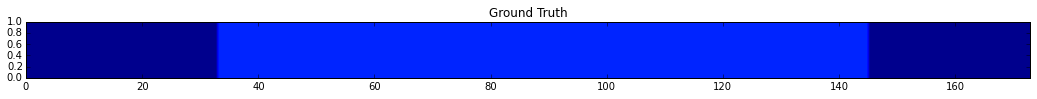

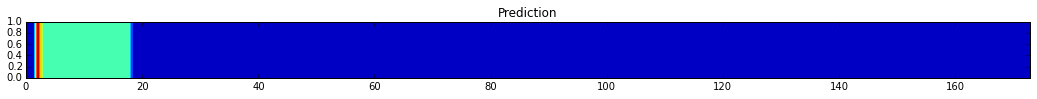

[{'score': 0.92307692307692313, 'segment': [4.4826028531983431, 19.851526921306949], 'label': 76}]


Video ID: hiVs1hNyPpw
Main Activity: Brushing hair


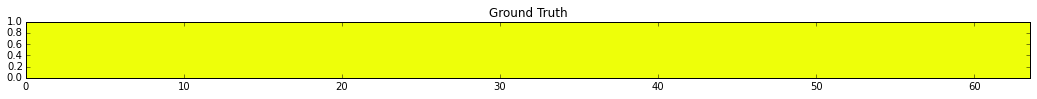

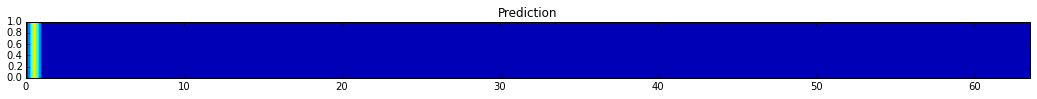

[{'score': 0.95833333333333337, 'segment': [1.6020682523267837, 26.701137538779729], 'label': 12}]




In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
normalize = matplotlib.colors.Normalize(vmin=0, vmax=201)

from work.processing.output import get_temporal_predictions_5

for v, prediction, class_prediction in predictions:
    v.get_video_instances(16, 0)
    ground_truth = np.array([instance.output for instance in v.instances])
    nb_instances = len(v.instances)
    
    x = np.arange(nb_instances)*16/v.fps
    y = np.array([0,1])
    print('Video ID: {}\nMain Activity: {}'.format(v.video_id, v.label))
    plt.figure(num=None, figsize=(18, 1), dpi=100)
    plt.contourf(x, y, np.broadcast_to(ground_truth, (2, nb_instances)), norm=normalize, interpolation='nearest')
    plt.title('Ground Truth')
    plt.show()
    
    plt.figure(num=None, figsize=(18, 1), dpi=100)
    plt.contourf(x, y, np.broadcast_to(class_prediction, (2, nb_instances)), norm=normalize, interpolation='nearest')
    plt.title('Prediction')
    plt.show()

    print(get_temporal_predictions_5(prediction, v.fps))

    
    print('\n')

Video ID: NjzUWVoc8rw
Main Activity: Tennis serve with ball bouncing
0.3052	Disc dog
0.2274	Tennis serve with ball bouncing
0.0541	Playing field hockey


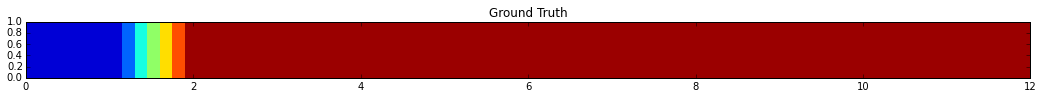

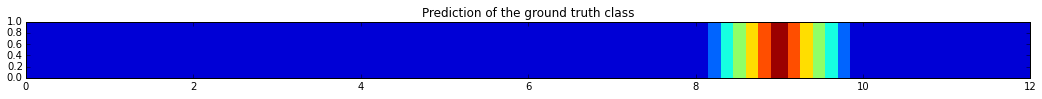

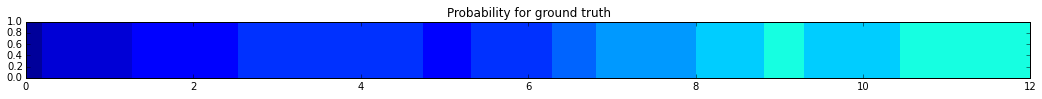

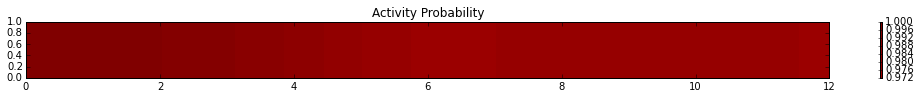

[{'score': 0.92307692307692313, 'segment': [1.6235944700460829, 7.0355760368663596], 'label': 27}]


Video ID: -M-Dr6HqDhU
Main Activity: Painting furniture
0.0231	Hanging wallpaper
0.0192	Blow-drying hair
0.0175	Bungee jumping


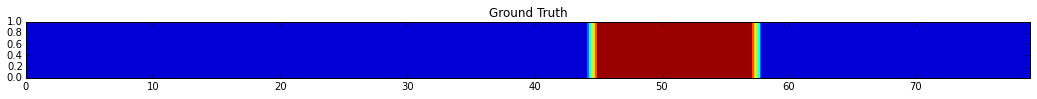

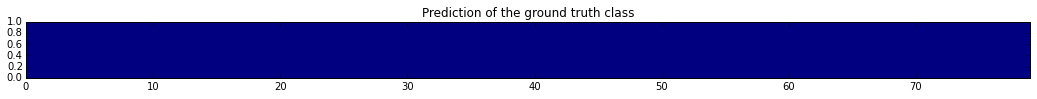

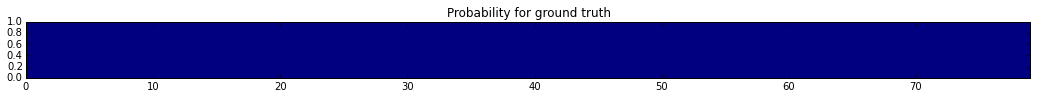

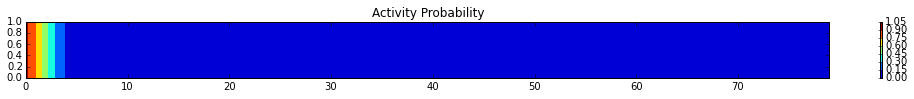

[]


Video ID: UGjF8G0HLZA
Main Activity: Paintball
0.4003	Paintball
0.1363	Archery
0.0262	Doing motocross


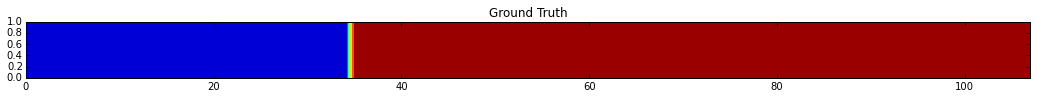

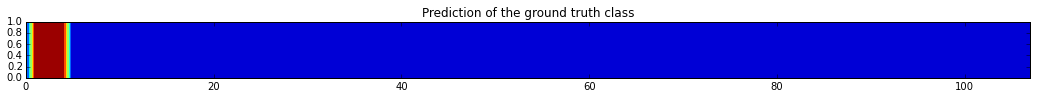

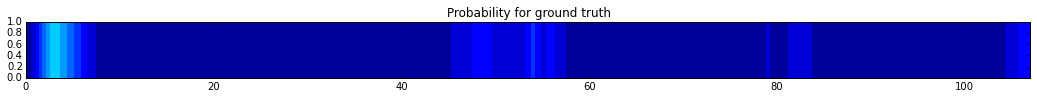

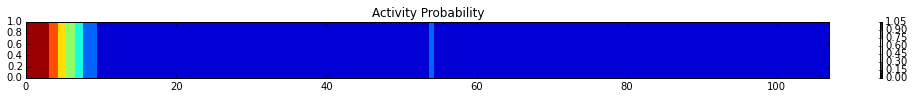

[{'score': 0.80000000000000004, 'segment': [1.3360275545350173, 4.0080826636050517], 'label': 134}]


Video ID: HzSCfBOefA4
Main Activity: Washing dishes
0.1881	Plastering
0.1309	Smoking hookah
0.0592	Drinking beer


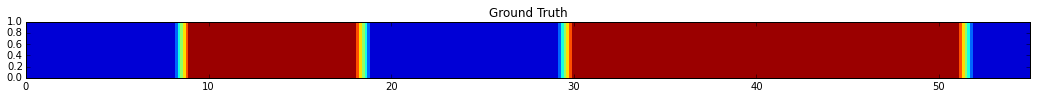

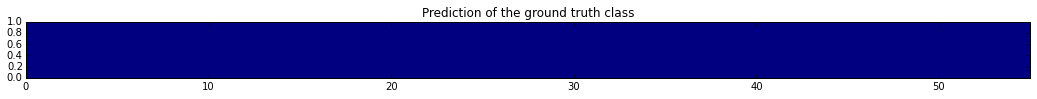

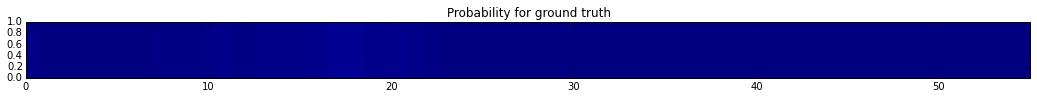

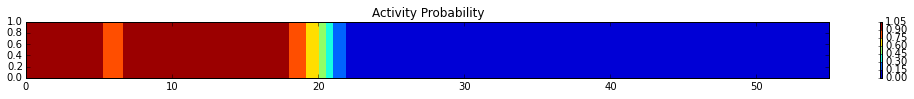

[{'score': 0.47368421052631576, 'segment': [5.8771078976640707, 10.685650723025583], 'label': 58}]


Video ID: MTJ1EtiizVQ
Main Activity: Tango
0.9710	Tango
0.0018	Breakdancing
0.0011	Belly dance


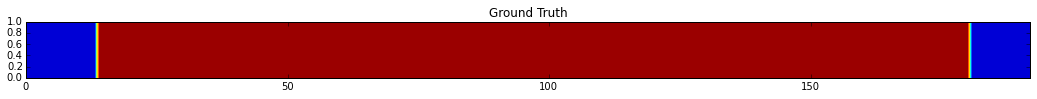

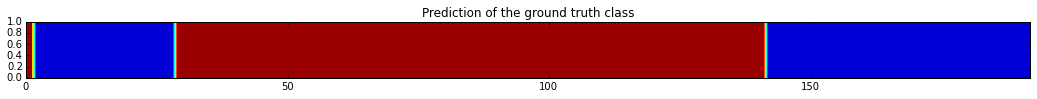

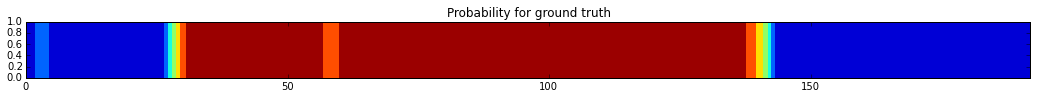

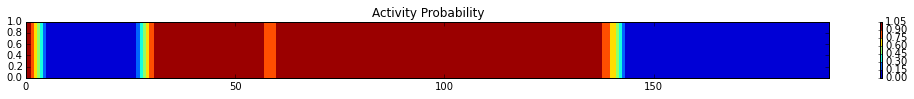

[{'score': 1.0, 'segment': [1.6049175024263993, 2.6748625040439986], 'label': 105}, {'score': 1.0, 'segment': [14.444257521837592, 76.501067615658357], 'label': 105}]


Video ID: 6j-H-tIjJvA
Main Activity: Beach soccer
0.8989	Beach soccer
0.0287	Playing blackjack
0.0124	Playing beach volleyball


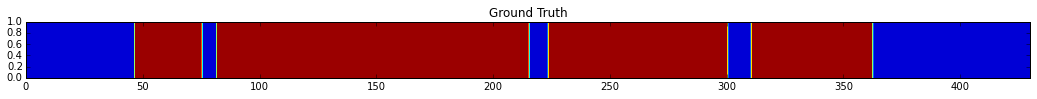

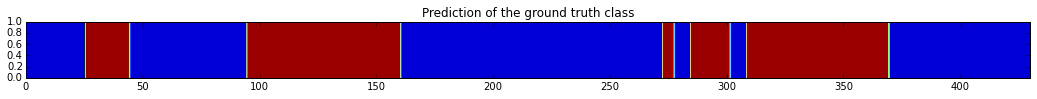

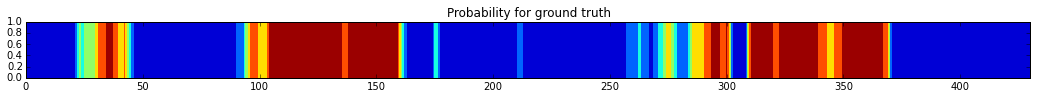

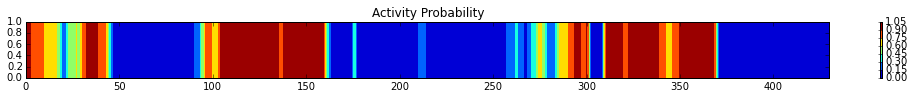

[{'score': 0.93854748603351956, 'segment': [11.751024164375634, 24.570323252785414], 'label': 7}, {'score': 0.93854748603351956, 'segment': [49.674783967587906, 87.064406308783106], 'label': 7}, {'score': 0.93854748603351956, 'segment': [93.474055852987988, 95.076468239039215], 'label': 7}, {'score': 0.93854748603351956, 'segment': [112.70300448560266, 113.77127940963682], 'label': 7}, {'score': 0.93854748603351956, 'segment': [138.87574012443929, 141.54642743452467], 'label': 7}, {'score': 0.93854748603351956, 'segment': [142.08056489654174, 142.61470235855882], 'label': 7}, {'score': 0.93854748603351956, 'segment': [143.68297728259296, 161.84365099117349], 'label': 7}, {'score': 0.93854748603351956, 'segment': [165.04847576327595, 198.16499840833455], 'label': 7}]


Video ID: UWTpfygMUQw
Main Activity: Fixing the roof
0.6308	Roof shingle removal
0.0372	Fixing the roof
0.0200	Pole vault


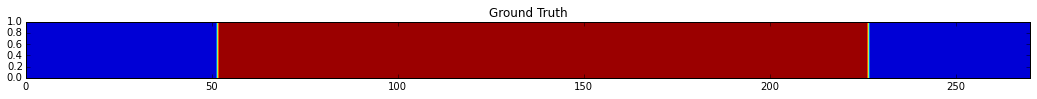

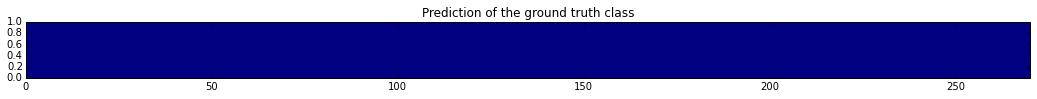

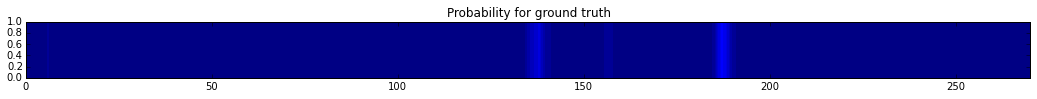

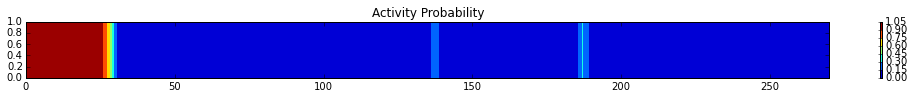

[{'score': 0.92307692307692313, 'segment': [4.4826028531983431, 19.851526921306949], 'label': 76}]


Video ID: hiVs1hNyPpw
Main Activity: Brushing hair
0.7894	Braiding hair
0.0907	Blow-drying hair
0.0197	Brushing hair


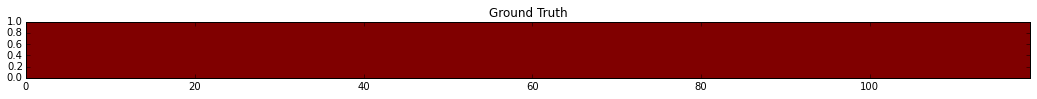

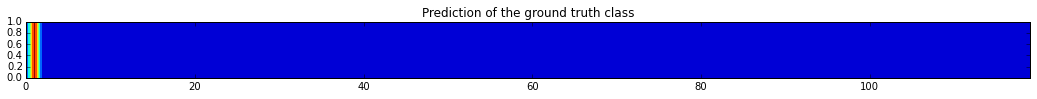

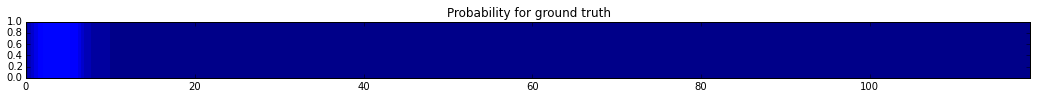

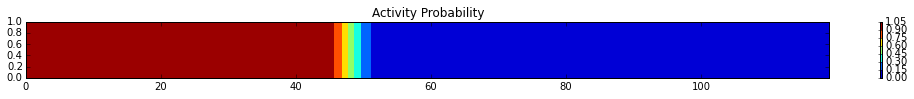

[{'score': 0.95833333333333337, 'segment': [1.6020682523267837, 26.701137538779729], 'label': 12}]




In [6]:
normalize = matplotlib.colors.Normalize(vmin=0, vmax=1)

for v, prediction, class_prediction in predictions:
    v.get_video_instances(16, 0)
    ground_truth = np.array([instance.output for instance in v.instances])
    nb_instances = len(v.instances)
    output_index = dataset.get_output_index(v.label)
    
    print('Video ID: {}\nMain Activity: {}'.format(v.video_id, v.get_activity()))

    class_means = np.mean(prediction, axis=0)
    top_3 = np.argsort(class_means[1:])[::-1][:3] + 1
    scores = class_means[top_3]/np.sum(class_means[1:])
    for index, score in zip(top_3, scores):
        if score == 0.:
            continue
        label = dataset.labels[index][1]
        print('{:.4f}\t{}'.format(score, label))
    
    plt.figure(num=None, figsize=(18, 1), dpi=100)
    plt.contourf(np.broadcast_to(ground_truth/output_index, (2, nb_instances)), norm=normalize, interpolation='nearest')
    plt.title('Ground Truth')
    plt.show()
    
    # print only the positions that predicted the global ground truth category
    temp = np.zeros((nb_instances))
    temp[class_prediction==output_index] = 1
    plt.figure(num=None, figsize=(18, 1), dpi=100)
    plt.contourf(np.broadcast_to(temp, (2, nb_instances)), norm=normalize, interpolation='nearest')
    plt.title('Prediction of the ground truth class')
    plt.show()
    
    plt.figure(num=None, figsize=(18, 1), dpi=100)
    plt.contourf(np.broadcast_to(prediction[:,output_index], (2, nb_instances)), norm=normalize, interpolation='nearest')
    plt.title('Probability for ground truth')
    plt.show()
    
    plt.figure(num=None, figsize=(18, 1), dpi=100)
    plt.contourf(np.broadcast_to(1-prediction[:,0], (2, nb_instances)), norm=normalize, interpolation='nearest')
    plt.title('Activity Probability')
    plt.colorbar()
    plt.show()

    print(get_temporal_predictions_5(prediction, v.fps))

        
    print('\n')

In [ ]:
data = np.array()
get_temporal_predictions_4(data)